In [1]:
import tensorflow as tf
import os

In [2]:
def load_audio(file_path, sample_rate=44100):
    # Load audio at 44.1kHz sample-rate
    audio = tf.io.read_file(file_path)
    audio, sample_rate = tf.audio.decode_wav(audio,\
                                             desired_channels=-1,\
                                             desired_samples=sample_rate)
    return tf.transpose(audio)

In [3]:
prefix = "dataset/data_speech_commands_v0.02/zero/"
paths = [os.path.join(prefix, path) for path in os.listdir(prefix)]

In [4]:
def prep_ds(ds, shuffle_buffer_size=1024, batch_size=16):
    # Randomly shuffle (file_path, label) dataset
    ds = ds.shuffle(buffer_size=shuffle_buffer_size)
    # Load and decode audio from file paths
    ds = ds.map(load_audio)
    # Take the absolute value
    ds = ds.map(tf.abs)
    # Apply log1p function
    ds = ds.map(tf.math.log1p)
    # Repeat dataset forever
    ds = ds.repeat()
    # Prepare batches
    ds = ds.batch(batch_size)
    # Prefetch
    ds = ds.prefetch(buffer_size=batch_size)

    return ds

In [5]:
ds = tf.data.Dataset.from_tensor_slices(paths)
train_ds = prep_ds(ds)

Take 1 batch and print it out

In [6]:
for x in train_ds.take(1):
    print(x)

tf.Tensor(
[[[1.8598416e-03 8.2363532e-04 9.1510848e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[1.2206286e-04 3.0517112e-05 3.0517112e-05 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[3.0517112e-05 1.5257625e-04 2.1360023e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 ...

 [[1.2206286e-04 3.3563701e-04 6.1016536e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[6.1033294e-05 1.8308870e-04 1.5257625e-04 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]

 [[1.0065733e-03 1.4332985e-03 1.9816777e-03 ... 0.0000000e+00
   0.0000000e+00 0.0000000e+00]]], shape=(16, 1, 44100), dtype=float32)


Text(0, 0.5, 'Value')

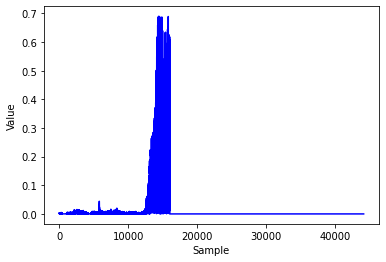

In [8]:
import matplotlib.pyplot as plt
plt.plot(x[0,:,:].numpy().T, color='blue')
plt.xlabel('Sample')
plt.ylabel('Value')